In [6]:
import numpy

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [39]:
def plot_matrix(M):
    plt.imshow(M, interpolation="none")
    plt.colorbar()

In [7]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

In [ ]:
R = [
         [5,3,0,1],
         [4,0,0,1],
         [1,1,0,5],
         [1,0,0,4],
         [0,1,5,4],
        ]

R = numpy.array(R)

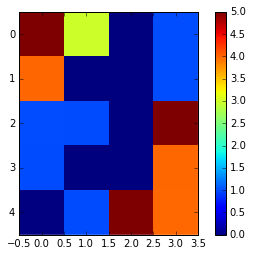

In [40]:
plot_matrix(R)

In [25]:
N = len(R)
M = len(R[0])
K = 3

P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

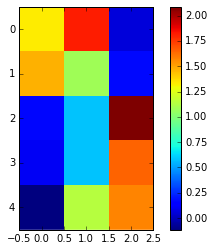

In [41]:
plot_matrix(P)

In [26]:
P

array([[ 0.31018679,  0.50598614,  0.79365895],
       [ 0.97714544,  0.36173439,  0.13524944],
       [ 0.00902645,  0.07008943,  0.00898029],
       [ 0.29019451,  0.72090204,  0.97494636],
       [ 0.13028218,  0.74412371,  0.77781678]])

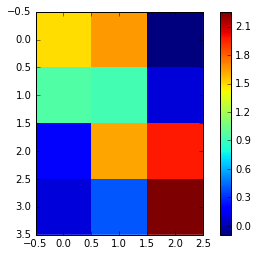

In [42]:
plot_matrix(Q)

In [27]:
Q

array([[ 0.22750755,  0.68589519,  0.14626214],
       [ 0.05394584,  0.32209298,  0.45652416],
       [ 0.00764667,  0.65078169,  0.85168772],
       [ 0.58027862,  0.63323387,  0.89327862]])

In [28]:
nP, nQ = matrix_factorization(R, P, Q, K)

In [29]:
nP

array([[ 1.33167759,  1.81735265,  0.06071051],
       [ 1.47289809,  1.0858277 ,  0.18412247],
       [ 0.17105272,  0.59053382,  2.0882898 ],
       [ 0.10960476,  0.58608522,  1.6531402 ],
       [-0.1151448 ,  1.14467631,  1.5729336 ]])

In [30]:
nQ

array([[ 1.48639963,  1.6579987 , -0.09355109],
       [ 0.95973146,  0.92306332,  0.09719503],
       [ 0.17958338,  1.63093738,  1.97871767],
       [ 0.09836141,  0.40391617,  2.25780045]])

In [31]:
nR = numpy.dot(nP, nQ.T)

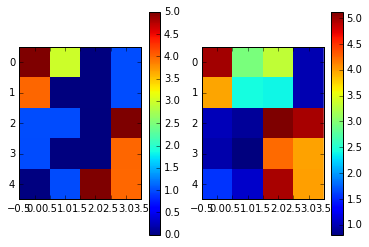

In [43]:
plt.subplot(1,2,1)
plot_matrix(R)
plt.subplot(1,2,2)
plot_matrix(nR)

In [32]:
sum(sum(abs(R - nR)))

20.336294453467325

In [24]:
R - nR

array([[ -6.66293824e-03,   9.95163856e-02,  -4.91019798e+00,
          3.27233622e-03],
       [  4.69197020e-02,  -2.29584318e+00,  -4.04160447e+00,
          3.64653937e-03],
       [ -9.30798294e-02,   2.37055754e-01,  -4.80227478e+00,
          4.00332681e-02],
       [  4.97553339e-02,  -6.53967833e-01,  -3.90782108e+00,
          2.75168503e-02],
       [ -2.07884117e+00,  -3.03477485e-01,   1.09410427e-01,
         -3.94149832e-02]])